In this notebook, i am using the dataset Classify "Handwritten Digits images"

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import loadmat

The dataset contains 5000 samples which has numbers ranging from 0 to 9. 

Each input is a 20*20 image flattended out into 400 columns. 

The dataset contains total of 500 images stored in matrix format

In [2]:
Data = loadmat(r"./MultiClass_Classification.mat")

In [3]:
X, y = Data["X"],Data["y"]

In [4]:
X.shape,y.shape

((5000, 400), (5000, 1))

Flatten out the output array/labels 

In [5]:
y = y.ravel()
y

array([10, 10, 10, ...,  9,  9,  9], dtype=uint8)

Reassign the label 10 as 0.

In [6]:
y[y==10]=0

## Visualization

The dataset has 500 images of each numbers(0-9) present in sorted order. SO i am just visualizing each number once.

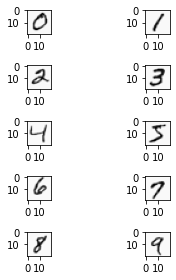

In [7]:
nrows = 5
ncols =2
fig,axes = plt.subplots(nrows=nrows,ncols=ncols)

image_index = 0
for i in range(nrows):
    for j in range(ncols):
        axes[i,j].imshow(X[image_index].reshape(20,20,order='F'),cmap='Greys')
        fig.tight_layout()
        if(image_index+500)==5000:
            break
        image_index +=500

## Expand the output labels to help using Logistic Regression as One v/s All Classifier

In [8]:
y_org = np.zeros((y.shape[0],10))
for i in range(len(y)):
    y_org[i][y[i]] = 1
    
y_org

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

## One v/s All Classification

In [9]:
def Sigmoid_fn(Z):
    return(1/(1 + np.exp(-Z)))

In [10]:
def Prediction(X,weights):
    Z = np.dot(X,weights)
    y_hat = Sigmoid_fn(Z)
    return y_hat

In [11]:
def Compute_cost(y,y_hat,length):
    J = -(1/length)* np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
    return J

In [12]:
def Gradient_descent(num_iterations,X,y,weights,cost,alpha,length):
    for i in range(1,num_iterations+1):
        y_hat = Prediction(X,weights)
        descent_direction = (1/length)*np.dot(X.transpose(),(y_hat - y))
        descent_step = alpha * descent_direction
        weights -= descent_step
        cost.append(Compute_cost(y,y_hat,length))
    return weights,cost

In [13]:
def plot_cost(cost,num_iterations):
    iterations = [i for i in range(1,num_iterations+1)]
    plt.plot(iterations,cost,color="g")
    plt.title("cost v/s Num of Iterations")
    plt.show()

In [14]:
def Initialize_Parameters(X):
    length = len(y)
    X = np.append(np.ones((length,1)),X,axis=1)
    All_weights = np.zeros((X.shape[1],y_org.shape[1]))
    return X,All_weights,length

In [15]:
def OneVsAll(X,y_org,All_weights,length):
    num_iterations = 1500
    alpha = 0.06
    for i in range(10):
        weights = np.zeros((X.shape[1],1))
        cost = []
        weights, cost = Gradient_descent(num_iterations,X,y_org[:,i].reshape(length,1),weights,cost,alpha,length)
        All_weights[:,i] = weights.reshape(X.shape[1],)
        print("--------------------------------------")
        print("The plot for classifiying number:" + str(i) + " v/s all the other numbers" )
        plot_cost(cost,num_iterations)
    print("--------------------------------------")

--------------------------------------
The plot for classifiying number:0 v/s all the other numbers


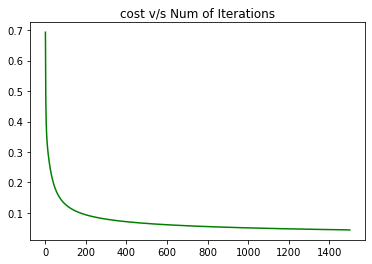

--------------------------------------
The plot for classifiying number:1 v/s all the other numbers


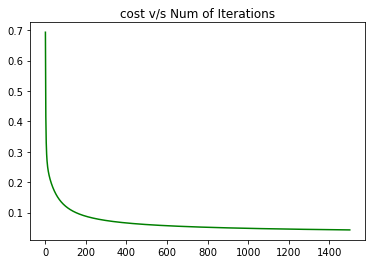

--------------------------------------
The plot for classifiying number:2 v/s all the other numbers


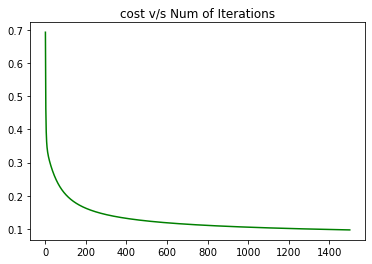

--------------------------------------
The plot for classifiying number:3 v/s all the other numbers


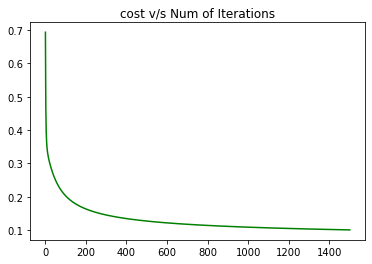

--------------------------------------
The plot for classifiying number:4 v/s all the other numbers


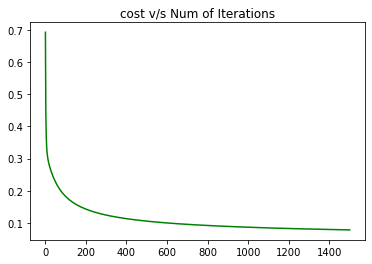

--------------------------------------
The plot for classifiying number:5 v/s all the other numbers


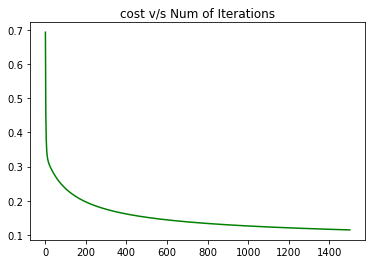

--------------------------------------
The plot for classifiying number:6 v/s all the other numbers


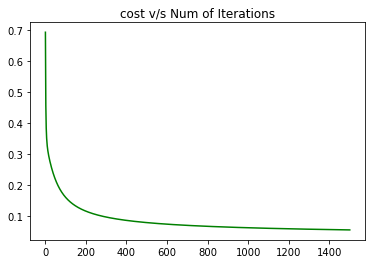

--------------------------------------
The plot for classifiying number:7 v/s all the other numbers


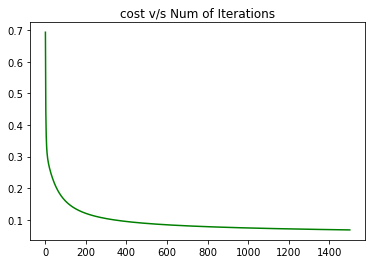

--------------------------------------
The plot for classifiying number:8 v/s all the other numbers


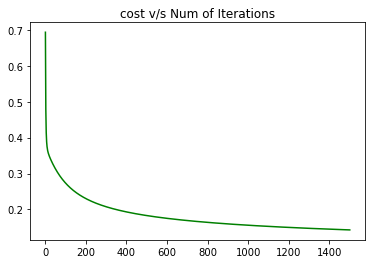

--------------------------------------
The plot for classifiying number:9 v/s all the other numbers


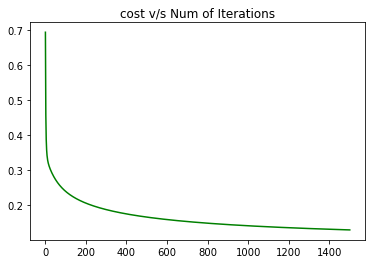

--------------------------------------


In [16]:
X,All_weights,length = Initialize_Parameters(X)
OneVsAll(X,y_org,All_weights,length)

In [17]:
X.shape,y_org.shape,All_weights.shape

((5000, 401), (5000, 10), (401, 10))

In [18]:
Output = X @ All_weights

In [19]:
Output

array([[  4.62759376, -10.05688135,  -6.42872553, ...,  -5.90723795,
         -6.55652301,  -5.60286286],
       [  3.68226467,  -9.1463703 ,  -7.91738628, ...,  -5.66461057,
         -8.39808415,  -7.67341772],
       [ -0.5713111 , -11.71242861,  -6.8685841 , ...,  -7.63363412,
         -2.27551326,  -5.94586505],
       ...,
       [ -7.10330091,  -3.75748712,  -4.45575962, ...,  -5.63585326,
         -3.0021483 ,  -0.42830028],
       [ -7.51317008,  -9.57634271, -11.27012074, ...,  -3.59511986,
         -4.04024266,  -0.13434151],
       [ -2.4245591 , -10.6250928 ,  -4.66823902, ...,  -1.97187745,
         -3.13859805,  -3.6956068 ]])

In [20]:
pred = np.argmax(Output,axis = 1)

In [21]:
print("The accuracy of the training samples:",np.mean(pred == y)*100)

The accuracy of the training samples: 89.78
